# **Machine Learning and Statistics Project**

***

Author: Roberto Vergano

**Python modules required**

In [31]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

**Table of contents**
1. Project goal.
2. Supervised learning.
3. Classification algorithms.
4. Practical implementation.
5. Conclusion.
6. References.

### **1. Project Goal**

The goal of this project is to develop a comprehensive notebook that delves into the application of classification algorithms on the Iris flower dataset, originally compiled by Ronald A. Fisher. It begins by introducing the concept of supervised learning, followed by a detailed explanation of what classification algorithms entail. The notebook will feature a practical implementation of one prevalent classification algorithm using the scikit-learn library in Python. Throughout, the notebook will incorporate various visual aids such as plots, mathematical symbols, and diagrams to effectively elucidate the underlying concepts. This approach aims to provide a clear, instructive, and visually engaging exploration of classification algorithms in the context of a well-known dataset.

### **2. Supervised Learning**

**What is supervised learning?**

Supervised learning, a key branch of machine learning and artificial intelligence, involves training algorithms using labeled datasets to accurately classify data or predict outcomes. In this process, the algorithm continually adjusts its parameters during training, using input data to improve accuracy, guided by cross-validation. This technique is widely employed in various real-world applications, such as email spam filtering.(1)

The core of supervised learning lies in its use of a training dataset, which includes both input data and correct outputs. This allows the model to incrementally learn and improve. The model's performance is evaluated using a loss function, which measures accuracy and guides the adjustments until minimal error is achieved.(1)

Supervised learning addresses two main types of problems in data mining: classification and regression. Classification involves categorizing test data into specific groups, using algorithms like linear classifiers, support vector machines (SVM), decision trees, k-nearest neighbors, and random forests. These algorithms help in identifying and labeling different entities within a dataset. On the other hand, regression focuses on understanding the relationships between dependent and independent variables. It's often used in forecasting scenarios, like projecting sales revenue, with popular methods including linear regression, logistical regression, and polynomial regression. Both classification and regression provide powerful tools for data analysis and prediction in various fields.(1)

<center>
    <h4> Figure 1. Supervised learning </h4>
    <img src="Images/supervisedlearning.png" width="500" height="340">
</center>


**What are the steps involved in supervised learning?**

The steps involved in supervised learning are:

- Determine the training dataset.
- Collection of labeled training data.
- Splitting the data into a train-test dataset.
- Identify the input characteristics of the training dataset.
- Select a suitable algorithm 
- Evaluate the model performance based on evaluation matrices.(2)

**What are the advanges and disadvantages of the supervised learning?**

Advantages:

- Explicit Feedback: Supervised learning models benefit from labeled data, providing clear feedback for training and improvement.
- Predictive Accuracy: When trained with high-quality, representative data, these models excel in accuracy, particularly in classification and regression tasks.
- Generalization: Effective supervised models can apply their learned knowledge to accurately predict outcomes for new, unseen data, making them practical for real-world scenarios.
- Interpretability: Algorithms like linear regression and decision trees offer interpretable models, allowing users to understand how inputs affect predictions.
- Wide Application Range: Supervised learning is versatile, applicable across fields like healthcare, finance, natural language processing, and computer vision.
- Resource Availability: There's a wealth of tools and libraries (e.g., scikit-learn, TensorFlow, PyTorch) available for implementing supervised learning algorithms.(3)

Disadvantages:

- Data Labeling Requirement: Acquiring labeled data can be costly and time-intensive, particularly for large datasets.
- Limitation to Labeled Data: These models are generally restricted to making predictions on data types similar to those they were trained on.
- Bias and Noise in Labels: Biases or errors in labeled data can lead the model to learn and replicate these inaccuracies.
- Overfitting Risk: Models might overfit to training data, capturing noise instead of underlying patterns. Regularization is often needed to address this.
- Feature Engineering Necessity: Effective model performance relies heavily on appropriate feature selection and engineering.
- Scalability Challenges: Training complex models on large datasets can be computationally demanding and resource-intensive.
- Constrained by Data Distribution: Performance may degrade when faced with data distributions different from the training set.
- Privacy Concerns: Use of labeled data in certain contexts may pose privacy risks, particularly if sensitive information is involved.
- Imbalanced Data Issues: Supervised models may have difficulty accurately predicting outcomes for minority classes in imbalanced datasets.
- Concept Drift: As relationships between features and targets evolve, models may need regular updates or retraining to stay effective.(3)

### **3. Classification Algorithms**

In supervised learning, classification algorithms are used to categorize data into predefined classes or categories. These algorithms learn from labeled training data and then use this learning to classify new, unseen data. Some of the most used are the ones presented below.

**Logistic Regression**

Logistic regression operates by analyzing the relationship between independent variables and a dependent binary variable, making it an effective tool for decision-making processes like determining if an email is spam. The algorithm employs a logistic or sigmoid function, which takes independent variables as input and outputs a probability value ranging between 0 and 1. In classification, if the probability exceeds a threshold value, typically 0.5, the instance is classified into one category (Class 1), otherwise, it falls into the other category (Class 0). Although it shares the term 'regression' with linear regression and extends from it, logistic regression differs significantly as it predicts the probability of an instance belonging to a particular class, rather than producing a continuous output value.(4)

The key characteristics of logistic regression include:

- Output as Categorical Data: It predicts the output of a categorical dependent variable, meaning the outcome is discrete such as Yes or No, 0 or 1, True or False.

- Probabilistic Nature: Instead of providing a definitive value like 0 or 1, logistic regression offers probabilistic values that lie between 0 and 1.

- Difference from Linear Regression: Although similar to linear regression in some aspects, logistic regression is distinctively used for classification problems, whereas linear regression is utilized for regression problems.

- Fitting an 'S' Shaped Curve: Logistic regression fits an S-shaped logistic function, rather than a straight line. This function is capable of predicting two maximum values (0 or 1), which is suitable for binary classification.

- Applications in Predicting Likelihoods: The curve of the logistic function can indicate the likelihood of various outcomes, such as determining whether cells are cancerous or predicting obesity in mice based on weight.

- Versatility and Effectiveness: Logistic regression is significant in machine learning for its ability to provide probabilities and classify new data, working well with both continuous and discrete datasets.

- Useful in Various Classifications: It can be employed to classify observations using different types of data and is effective in identifying the most influential variables for classification.(4)

The sigmoid or logistic function in logistic regression maps any real value to a probability between 0 and 1, creating an S-shaped curve (Figure 2). It uses a threshold value to classify outcomes: values above the threshold are classified as 1, and those below as 0.(4,5)

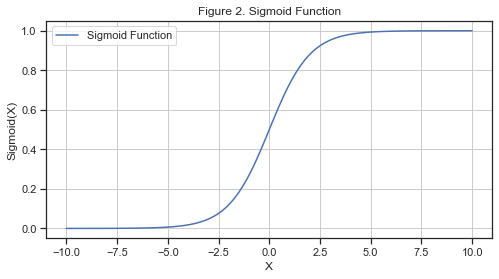

In [33]:
# Sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Range of values from -10 to 10
x = np.linspace(-10, 10, 100)

# Apply the sigmoid function to these values
y = sigmoid(x)

# Plotting 
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sigmoid Function")
plt.title("Figure 2. Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.grid(True)
plt.legend()
plt.show()

**Decission Trees**

A decision tree is a versatile, non-parametric algorithm used in supervised learning for both classification and regression tasks. It features a hierarchical structure with a root node, branches, internal nodes (decision nodes), and leaf nodes (terminal nodes)(Figure 3), where decisions are made and outcomes represented.(6)

<center>
    <h4> Figure 3. Decision tree </h4>
    <img src="Images\decision-tree-classification-algorithm.png" width="500" height="340">
</center>

The algorithm uses a divide-and-conquer strategy, performing a search to find optimal split points in the tree. It splits data recursively from the top down until records are classified under specific labels. The complexity of the tree affects its ability to achieve homogenous leaf nodes, with smaller trees often achieving purer nodes. However, larger trees may struggle with data fragmentation and overfitting.(6)

To address overfitting and maintain simplicity, decision trees adhere to Occam’s Razor principle, favoring smaller trees and adding complexity only when necessary. Pruning, which involves removing less important branches, is a method used to reduce complexity. The tree's performance is often assessed through cross-validation.(6)

For enhanced accuracy, decision trees can be part of an ensemble, like in a random forest algorithm. This approach combines multiple trees, improving prediction accuracy, especially when individual trees are uncorrelated.(6)

**Random Forest**

Support Vector Machines (SVMs): SVMs are effective in high dimensional spaces and are used for both classification and regression tasks. They work by finding the hyperplane that best divides a dataset into classes.

Naïve Bayes: This is a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naïve) independence assumptions between the features.

K-Nearest Neighbors (KNN): KNN classifies data based on the closest training examples in the feature space. It is a type of instance-based learning or lazy learning.

Neural Networks: These are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, or clustering raw input.

### **4. Practical Implementation of Classification Algorithms**

K-Nearest Neighbors (KNN)  
Random Forest

**Loading the dataset**

In [2]:
# Load the dataset.
dt = pd.read_csv("Datasets\iris.csv")
# info () to see a summary of the dataset.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


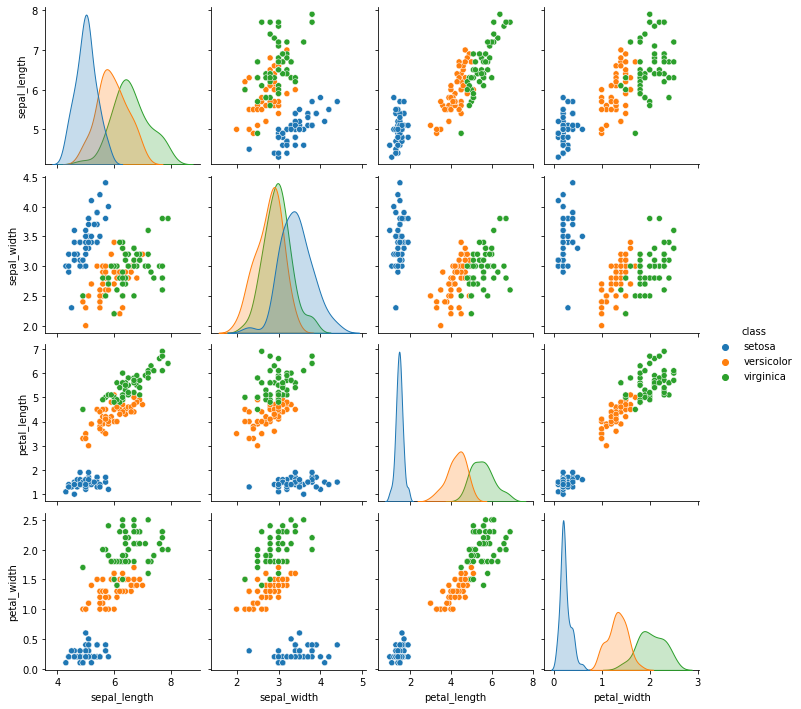

In [3]:
# Visualize the dataset
sns.pairplot(dt, hue ="class")

**Data preprocessing**

In [4]:
# Check for missing values in the entire dataset
total_missing = dt.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


No need to drop any NaN values.

**Scaling**

assumption - data is normally distributed - check that first for each class 
- do an histogram and then sharpiro test - copy and paste task 3

**Histogram**

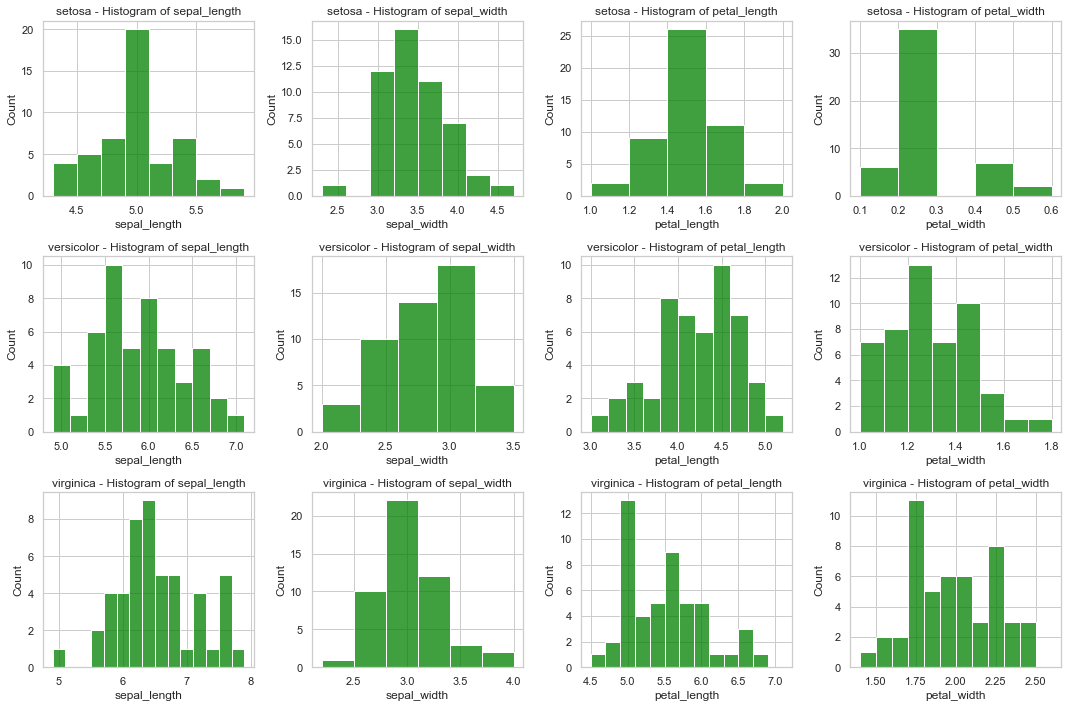

In [5]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure with multiple subplots for each class
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# List of numerical features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# List of classes
classes = dt['class'].unique()

# Specify the bin width for each feature
bin_widths = {'sepal_length': 0.2, 'sepal_width': 0.3, 'petal_length': 0.2, 'petal_width': 0.1}

# Plotting histograms for each class and each feature
for i, iris_class in enumerate(classes):
    for j, feature in enumerate(features):
        sns.histplot(data=dt[dt['class'] == iris_class], x=feature, binwidth=bin_widths[feature], color='green', ax=axes[i, j])
        axes[i, j].set_title(f'{iris_class} - Histogram of {feature}')

        
# Adjusting layout
plt.tight_layout()

**Shapiro-Wilk Test**

In [6]:
idf = dt

# Petal length variables per class:
petal_length_setosa = idf.loc[idf["class"] == "setosa", "petal_length"]
petal_length_versicolor = idf.loc[idf["class"] == "versicolor", "petal_length"]
petal_length_virginica = idf.loc[idf["class"] == "virginica", "petal_length"]

# Petal width variables per class: 
petal_width_setosa = idf.loc[idf["class"] == "setosa", "petal_width"]
petal_width_versicolor = idf.loc[idf["class"] == "versicolor", "petal_width"]
petal_width_virginica = idf.loc[idf["class"] == "virginica", "petal_width"]

# Sepal length variables per class:
sepal_length_setosa = idf.loc[idf["class"] == "setosa", "sepal_length"]
sepal_length_versicolor = idf.loc[idf["class"] == "versicolor", "sepal_length"]
sepal_length_virginica = idf.loc[idf["class"] == "virginica", "sepal_length"]

# Sepal width variables per class:
sepal_width_setosa = idf.loc[idf["class"] == "setosa", "sepal_width"]
sepal_width_versicolor = idf.loc[idf["class"] == "versicolor", "sepal_width"]
sepal_width_virginica = idf.loc[idf["class"] == "virginica", "sepal_width"]

# Function to perform the Shapiro-Wilk test and return the results as a dataframe:
def shapiro_test(data, label):
    stat, p_value = shapiro(data)
    return pd.DataFrame({
        "Variable": [label],
        "Statistic": [stat],
        "P-value": [p_value]
    })

# Concatenate the results into a single dataframe:
results = pd.concat([
    shapiro_test(petal_length_setosa, "Petal Length Setosa"),
    shapiro_test(petal_length_versicolor, "Petal Length Versicolor"),
    shapiro_test(petal_length_virginica, "Petal Length Virginica"),
    
    shapiro_test(petal_width_setosa, "Petal Width Setosa"),
    shapiro_test(petal_width_versicolor, "Petal Width Versicolor"),
    shapiro_test(petal_width_virginica, "Petal Width Virginica"),
    
    shapiro_test(sepal_length_setosa, "Sepal Length Setosa"),
    shapiro_test(sepal_length_versicolor, "Sepal Length Versicolor"),
    shapiro_test(sepal_length_virginica, "Sepal Length Virginica"),
    
    shapiro_test(sepal_width_setosa, "Sepal Width Setosa"),
    shapiro_test(sepal_width_versicolor, "Sepal Width Versicolor"),
    shapiro_test(sepal_width_virginica, "Sepal Width Virginica"),
], ignore_index=True)

# Display results in a table:
table = tabulate(results, headers="keys", tablefmt="fancy_grid", showindex=False)
print(table)

╒═════════════════════════╤═════════════╤═════════════╕
│ Variable                │   Statistic │     P-value │
╞═════════════════════════╪═════════════╪═════════════╡
│ Petal Length Setosa     │    0.954946 │ 0.0546492   │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Length Versicolor │    0.966005 │ 0.158483    │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Length Virginica  │    0.962186 │ 0.109774    │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Setosa      │    0.813817 │ 1.85258e-06 │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Versicolor  │    0.947627 │ 0.0272782   │
├─────────────────────────┼─────────────┼─────────────┤
│ Petal Width Virginica   │    0.959772 │ 0.0869574   │
├─────────────────────────┼─────────────┼─────────────┤
│ Sepal Length Setosa     │    0.977699 │ 0.459528    │
├─────────────────────────┼─────────────┼─────────────┤
│ Sepal Length Versicolor │    0.977836 │ 0.4647

**Petal width setosa and petal width versicolor - Probability plot**

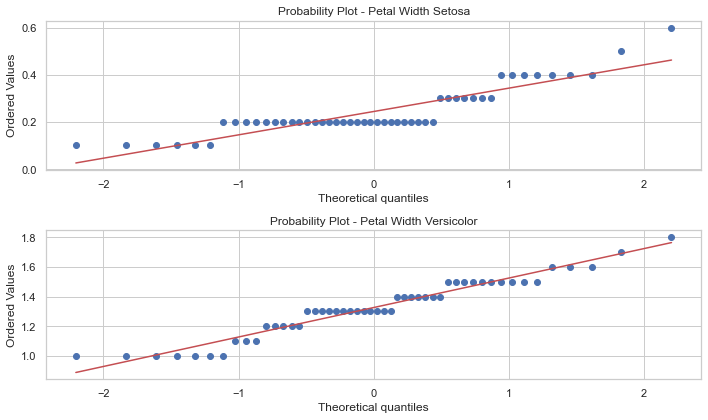

In [7]:
# Probplot for petal_width_setosa and petal_width_versicolor

# Probability plots for each variable:
plt.figure(figsize=(10, 6))

# Probability plot for Petal Width Setosa
plt.subplot(2, 1, 1)
probplot(petal_width_setosa, plot=plt)
plt.title('Probability Plot - Petal Width Setosa')

# Probability plot for Petal Width Versicolor
plt.subplot(2, 1, 2)
probplot(petal_width_versicolor, plot=plt)
plt.title('Probability Plot - Petal Width Versicolor')

plt.tight_layout()
plt.show()

In [8]:
# Conclusions

#### **4.1. KNN NEIGHBORS**

In [9]:
# Euclidean distance (p=2)

from IPython.display import display, Math

# Euclidean distance formula
latex_code = r'd(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}'

# Displaying the formula
display(Math(latex_code))


<IPython.core.display.Math object>

p,q	= 	two points in Euclidean n-space  
q_i, p_i	= 	Euclidean vectors, starting from the origin of the space (initial point)  
n	= 	n-space

In [10]:
# Manhattan distance formula
latex_code = r'd(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} |p_i - q_i|'

# Displaying the formula
display(Math(latex_code))

<IPython.core.display.Math object>

In [11]:
# LaTeX code for the Minkowski distance formula
latex_code = r'd(\mathbf{p}, \mathbf{q}) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{\frac{1}{p}}'

# Displaying the formula
display(Math(latex_code))


<IPython.core.display.Math object>

**Splitting into training and test sets**

In [12]:
# Preprocess the Data
X = dt.drop('class', axis=1)
y = dt['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 - manhattan distance
 - euclidian distance

 see scikit learn - examples for KNN
 https://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py


**Scaling the dataset**

In machine learning, the use of a scaler, such as a StandardScaler or MinMaxScaler, is important when the features of the dataset are on different scales, particularly for algorithms that are sensitive to the scale of the data. However, the decision to use a scaler depends on the characteristics of the dataset and the algorithm being used. Let's consider why a scaler was not deemed necessary in the case of the Random Forest classifier on the Iris dataset:

Nature of the Random Forest Algorithm:
        Random Forest, being an ensemble of decision trees, is not sensitive to the magnitude of features. This is because decision trees split nodes based on the order of the data (e.g., whether a feature is greater than a certain threshold) rather than the specific magnitude of feature values.
        The relative scaling of features doesn't affect the decision-making process in tree-based methods, including Random Forest, as it does in algorithms like SVM or k-NN, where the Euclidean distance between data points is important.

Characteristics of the Iris Dataset:
        The Iris dataset features (sepal length, sepal width, petal length, and petal width) are all measured in centimeters and are somewhat comparable in scale.
        While there are differences in the ranges of these measurements, they are not drastically different to a point where scaling would significantly impact the performance of a Random Forest model.

Generalization and Interpretability:
        Using the data in its original scale can sometimes be beneficial for interpretation and understanding the importance of features. Scaling can obscure these interpretations, especially when it's not necessary for the algorithm.

In summary, while scaling is an important preprocessing step for many machine learning algorithms, it is generally not required for tree-based methods like Random Forest, especially when the features are already on a comparable scale, as in the Iris dataset. However, in scenarios where features are on drastically different scales or when using algorithms sensitive to feature scaling, applying a scaler is an important step.

In [13]:
# Standardizing the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Create and train the KNN model**

In [14]:
# Create and Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5) # Using K=5 as an example
knn.fit(X_train, y_train)

KNeighborsClassifier()

**KNN model evaluation**

Precision  
REcall  
f1-score  
support  
confusion matrix  

In [15]:
# Model Evaluation
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Converting classification report to a DataFrame for better presentation
class_report_df = pd.DataFrame(class_report).transpose()


In [16]:
class_report_df

,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,10.0
versicolor,1.0,1.0,1.0,9.0
virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


<Figure size 720x576 with 0 Axes>

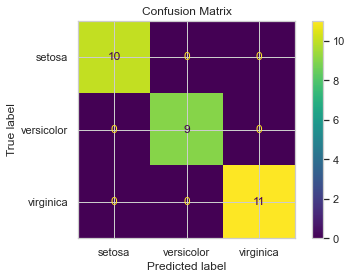

In [17]:
# Displaying the Confusion Matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_).plot(values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

**Cross-validation**

The results from your cross-validation provide valuable insights into the performance of your K-Nearest Neighbors (KNN) model on the Iris dataset:

Cross-validation Scores for Each Fold:
        [0.73333333, 0.73333333, 0.76666667, 0.83333333, 0.73333333]
        These scores represent the accuracy of your KNN model for each of the five folds used in the cross-validation. In each fold, a different subset of your data was used as the test set while the remaining data served as the training set.
        The scores vary slightly for each fold, indicating that the model's performance is somewhat sensitive to the particular data points included in the training and test sets.

Mean Cross-validation Score:
        0.76
        This is the average of the five accuracy scores obtained from the cross-validation. A mean score of 0.76 suggests that, on average, the model correctly predicts the class of an iris flower 76% of the time.
        This metric gives a more generalized idea of the model's performance across the entire dataset, rather than relying on a single train-test split.

 Standard Deviation of Cross-validation Scores:
        0.038873012632302036
        The standard deviation measures the amount of variation or dispersion in the cross-validation scores.
        A standard deviation of approximately 0.039 suggests that the accuracy scores across the five folds do not vary too dramatically from the mean accuracy (0.76). However, it does indicate some variability in model performance across different subsets of the dataset.
        In practical terms, this means that depending on the specific data the model is trained on, its accuracy could vary around the mean value, but generally within a relatively narrow range.

In summary, your KNN model achieves an average accuracy of 76% with a small variability in performance across different subsets of the data. This suggests a reasonably stable and reliable model for this dataset, although there might be room for improvement, possibly through parameter tuning or using a different model.

In [18]:


# Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Applying 5-fold cross-validation
# X and y are your features and target variable from the entire dataset, not split into train/test
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# The scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

# Mean and standard deviation of the scores
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())


Cross-validation scores for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.9733333333333334
Standard deviation of cross-validation scores: 0.02494438257849294


**Exploring other K values for better performance**

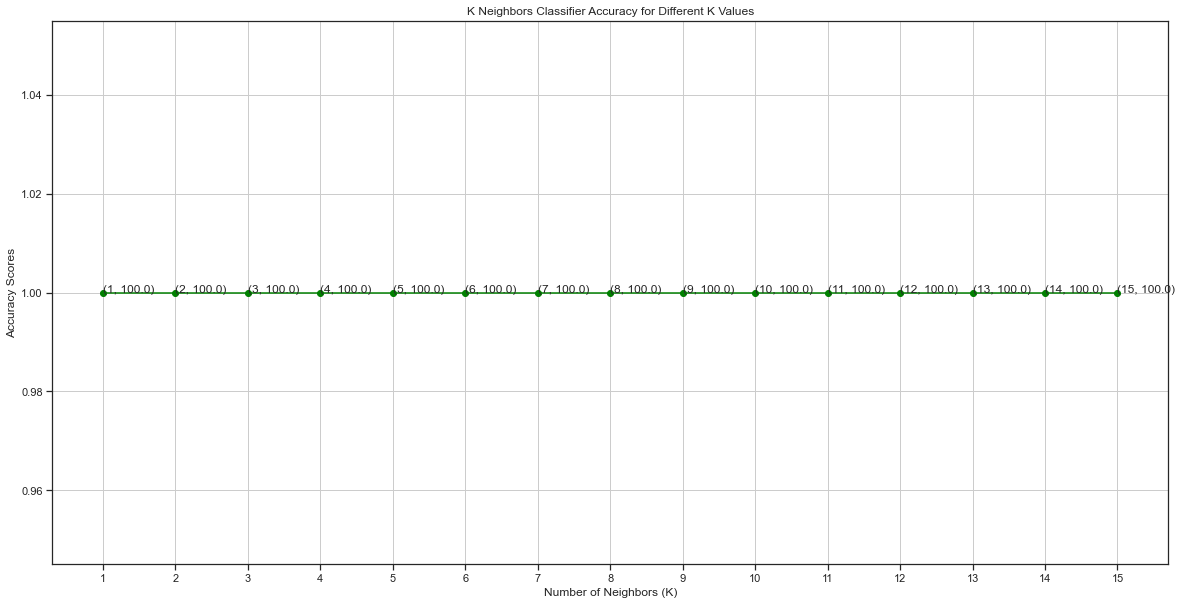

In [19]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Your existing code for calculating accuracies
knn_values = []
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    a = accuracy_score(pred, y_test)
    knn_values.append(a)

# Plotting enhancements
plt.figure(figsize=(20, 10))
sns.set(style="ticks")
plt.plot([k for k in range(1, 16)], knn_values, color='green', marker='o')
for i in range(1, 16):
    plt.text(i, knn_values[i - 1], (i, round(knn_values[i - 1] * 100, 2)))
plt.xticks([i for i in range(1, 16)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Scores')
plt.title('K Neighbors Classifier Accuracy for Different K Values')
plt.grid(True)
plt.show()


**Parameter Tuning**

Experiment with different values of K.
You might also want to try different distance metrics (like Euclidean, Manhattan) to see how they affect the model's performance.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [20]:
from sklearn.model_selection import GridSearchCV

# Setting the parameter grid
param_grid = {'n_neighbors': range(1, 30)}

# Using grid search to find the best K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']

best_k

3

In [21]:
# Best score achieved
best_score = grid_search.best_score_
best_score

0.95

**Learning curve analysis**

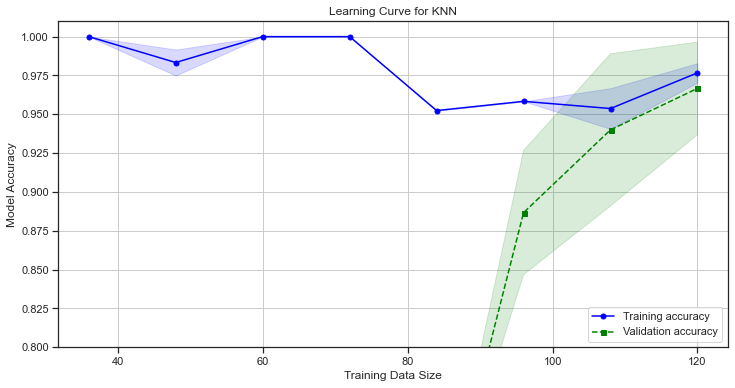

In [22]:

from sklearn.model_selection import learning_curve
import numpy as np

# Conduct learning curve analysis
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available processors
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for KNN')
plt.xlabel('Training Data Size')
plt.ylabel('Model Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.01])
plt.grid()
plt.show()


The learning curve analysis for the K-Nearest Neighbors (KNN) model using the Iris dataset has been conducted. The plot displays two key trends:

Training Accuracy: As the training data size increases, the training accuracy slightly decreases. This is typical because a model trained on a smaller dataset can easily memorize the training data, leading to higher accuracy. As the dataset grows, it becomes harder for the model to fit perfectly, causing a slight decrease in training accuracy.

Validation Accuracy: The validation accuracy increases with the size of the training data. Initially, when the training data size is small, the model is not generalized enough, leading to lower validation accuracy. As more data is used for training, the model becomes better at generalizing to unseen data, improving its validation accuracy.

Overall, the learning curve indicates that the model benefits from more training data, as seen by the convergence of training and validation accuracy. A good balance is achieved when both accuracies are high and close to each other, suggesting that the model is neither overfitting nor underfitting. ​
​

**Evaluate the performance of difference distance metrics**

To try different distance metrics such as Euclidean and Manhattan in a K-Nearest Neighbors (KNN) model and see how they affect performance on your Iris dataset, you can follow these steps:

Choose Distance Metrics: Decide on the distance metrics you want to evaluate. Common choices include 'euclidean', 'manhattan', and 'minkowski'.

Create KNN Models for Each Metric: For each chosen metric, create a KNN model specifying that metric.

Evaluate Model Performance: Train each model on the training data and evaluate its performance on the test data. Common evaluation metrics include accuracy, precision, recall, and F1-score.

Compare Results: Compare the performance results of the models with different distance metrics to determine which metric works best for your dataset.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# List of different distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Dictionary to store accuracy for each metric
accuracy_scores = {}

for metric in distance_metrics:
    # Create KNN model with the specified metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracy_scores[metric] = accuracy

# Print the results
for metric, accuracy in accuracy_scores.items():
    print(f"Accuracy with {metric} metric: {accuracy:.2f}")


Accuracy with euclidean metric: 1.00
Accuracy with manhattan metric: 1.00
Accuracy with minkowski metric: 1.00


**KNN Limitations**

K-Nearest Neighbors (KNN) is a simple and often effective classification algorithm, but it does come with certain limitations, especially when applied to datasets like the Iris dataset. Here are some of the key limitations and potential ways to address or improve them:
Limitations of KNN

Sensitivity to Scale and Outliers:
KNN is sensitive to the scale of the data and outliers because it relies on the distance between data points to make classifications.
Improvement: Proper scaling of features and outlier treatment can mitigate this issue.

Curse of Dimensionality:
As the number of features increases, the volume of the feature space increases exponentially, making the data sparse. This sparsity affects the performance of KNN, which is problematic for high-dimensional data.
Improvement: Dimensionality reduction techniques like PCA (Principal Component Analysis) can be used to reduce the feature space to a manageable size.

Computational Intensity:
KNN can be computationally expensive, especially with large datasets, as it involves calculating the distance of a new data point to every other point in the dataset.
Improvement: Using algorithms like KD-Tree or Ball Tree can significantly reduce computation time.

Choice of K and Distance Metric:
The performance of KNN is heavily dependent on the choice of the number of neighbors (K) and the distance metric (e.g., Euclidean, Manhattan).
Improvement: Cross-validation and grid search can help in finding the optimal K value. Experimenting with different distance metrics based on the data type can also be beneficial.

No Model Training Phase:
KNN does not learn anything from the training data and essentially memorizes the entire dataset. This can be a drawback as it doesn't build an internal model.
Improvement: Pre-processing steps and feature engineering can be more focused to compensate for the lack of a learning phase.

#### **4.2 Random Forest Model**

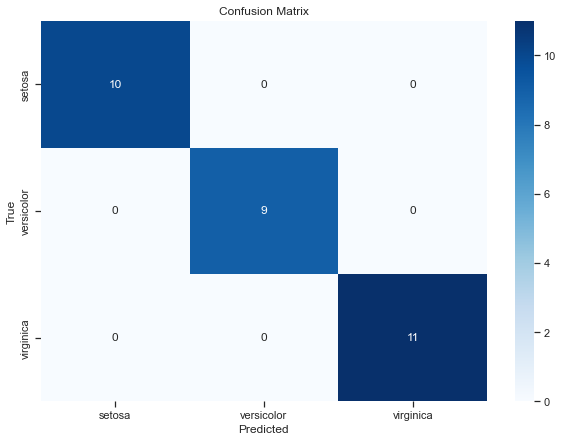

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = dt['class'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Model evaluation
evaluation_report = classification_report(y_test, y_pred)
print(evaluation_report)

**Hyperparameter Tuning**

In [25]:
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\ROB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 50}

The output you've provided is the result of hyperparameter tuning using GridSearchCV for a Random Forest classifier. It shows the best parameters found for the model based on the range of parameters you specified and the dataset used. Here's a breakdown of what each parameter means:

'criterion': 'gini'
        The criterion parameter specifies the function to measure the quality of a split in the decision trees of the Random Forest. In this case, 'gini' indicates that the Gini impurity measure is used. Gini impurity is a commonly used metric that measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

'max_depth': 4
        The max_depth parameter determines the maximum depth of each tree in the Random Forest. A depth of 4 means that each decision tree in the forest can have a maximum of four levels. Limiting the depth of the trees can help prevent overfitting by not allowing the trees to become overly complex.

'max_features': 'auto'
        The max_features parameter specifies the number of features to consider when looking for the best split. The value 'auto' means that the number of features considered at each split is equal to the square root of the total number of features. This is a common heuristic used in Random Forest classifiers.

'n_estimators': 50
        The n_estimators parameter indicates the number of trees in the forest. Here, the optimal number of trees is found to be 50. Generally, a higher number of trees in the forest can lead to better performance but also increases computational cost.

These parameters combined specify the configuration of the Random Forest model that was found to be the most effective for your dataset, based on the criteria of the GridSearchCV process. By tuning these parameters, you can often achieve a better performing model compared to using default values.

**Learning Curve**

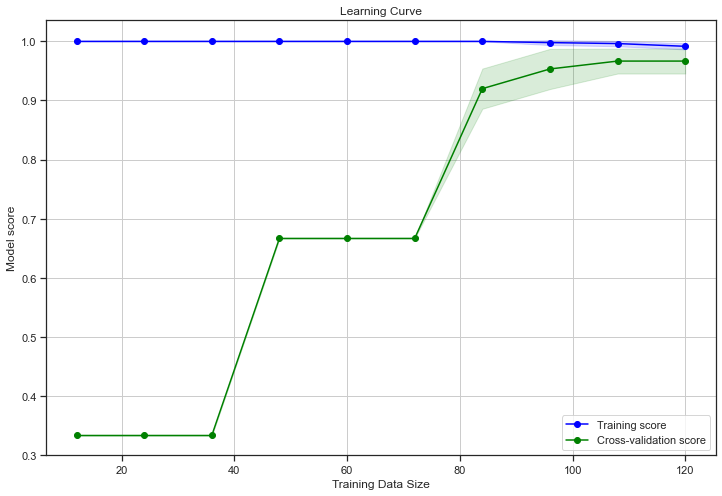

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np

# Define the model with the best parameters found
optimized_rf_model = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=4, max_features='auto', random_state=42)

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=optimized_rf_model,
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)
plt.plot(train_sizes, validation_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model score')
plt.legend(loc='best')
plt.grid()
plt.show()


The Learning Curve plotted above shows how the model's performance (both on the training set and the cross-validation set) evolves as the size of the training data increases. Here's how to interpret this plot:

Training Score (Blue Line):
        This line represents the model's performance on the training dataset. As the size of the training data increases, the training score typically decreases. This is because it's easier for the model to fit to a smaller dataset, but as the dataset grows, it becomes more challenging for the model to fit perfectly to all the data points.
        The shaded blue area represents the variability (standard deviation) of the training score, indicating the consistency of the model's performance on different subsets of the training data.

Cross-validation Score (Green Line):
        The green line shows the model's performance on the unseen data (cross-validation set). Unlike the training score, the cross-validation score usually increases with more training data. This happens as the model learns more general patterns that are better at predicting unseen data.
        The shaded green area shows the variability in the cross-validation score, reflecting how the model's performance on the validation set varies with different subsets of the data.

Interpreting the Learning Curve:
        As the training data size increases, the two lines converge. The ideal scenario is where both training and validation scores are high and close to each other, indicating that the model is neither underfitting nor overfitting.
        In this specific plot, both the training and validation scores seem quite high, and they converge as more data is used. This suggests that the model is learning effectively from the training data and generalizing well to new, unseen data.

Overall, the learning curve is a valuable tool for understanding how more training data influences your model's performance and can indicate whether collecting more data or adjusting the model's complexity could improve performance. ​

​


**cross-validation**

In [27]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(optimized_rf_model, X, y, cv=5)

# Calculating mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


c:\Users\ROB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ROB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ROB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Random

(0.9666666666666668, 0.02108185106778919)

The cross-validation process with 5 folds on the Random Forest model produced the following results:

Mean Accuracy: Approximately 96.67%
Standard Deviation: Approximately 2.11%

These results suggest that the model performs quite well on the Iris dataset. The high mean accuracy indicates that, on average, the model correctly predicts the iris species about 96.67% of the time across the different folds.

The standard deviation of the cross-validation scores is about 2.11%, which is relatively low. This implies that the model's performance is consistent across different subsets of the data. A lower standard deviation in cross-validation scores is desirable as it shows less variability in the model's performance.

Cross-validation is a robust method to evaluate the model because it reduces the variability that might result from a single split of the data. By training and testing the model on different subsets of the data, it gives a better indication of how the model might perform on unseen data. 

**Feature importance**

c:\Users\ROB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


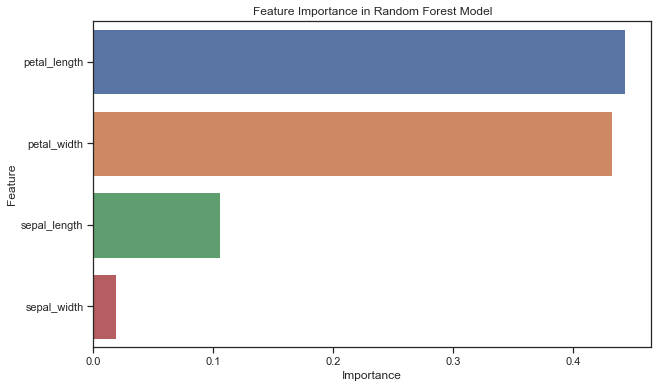

,Feature,Importance
2,petal_length,0.443027
3,petal_width,0.432450
0,sepal_length,0.105515
1,sepal_width,0.019008


In [28]:
# Train the optimized Random Forest model on the entire dataset
optimized_rf_model.fit(X, y)

# Extract feature importance
feature_importance = optimized_rf_model.feature_importances_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df


The bar chart and the table display the importance of each feature in the optimized Random Forest model trained on the entire Iris dataset. The feature importances are derived from how much each feature contributes to improving the purity of the nodes and ultimately the decisions in the trees of the Random Forest. Here's what the results indicate:

petal_length (Approx. 44.30% Importance):
        This is the most important feature in predicting the iris species. It has the highest score, indicating that it contributes significantly to the model's decision-making process.

petal_width (Approx. 43.25% Importance):
        Very close to petal_length in terms of importance, petal_width is also a crucial feature for the model's predictions.

sepal_length (Approx. 10.55% Importance):
        While not as critical as petal measurements, sepal_length still plays a notable role in the classification.

sepal_width (Approx. 1.90% Importance):
        This feature has the least importance among the four. It contributes relatively little to the model's predictive ability compared to the other features.

Understanding feature importance can be crucial for several reasons:

It provides insights into the dataset and how different features affect the outcome.
It can guide feature engineering and selection, potentially leading to more efficient and interpretable models.
In some cases, it may lead to a better understanding of the underlying processes that generated the data.

#### **4.3. Model comparison**

### **5. Conclusion**

### **6. References**